## tracks 
- log.csv
- 軸周り設定 https://www.yutaka-note.com/entry/matplotlib_axis
- カラーマップ cmap https://matplotlib.org/stable/users/explain/colors/colormaps.html

In [62]:
folder_paths = [
    r"E:\_C.elegans\FigX\ana\20240507-192521tdTomato-26mW-1",
    r"E:\_C.elegans\FigX\ana\20240507-202252tdTomato-19mW-2",
    r"E:\_C.elegans\FigX\ana\20240507-203354tdTomato-19mW-5",
    r"E:\_C.elegans\FigX\ana\20240508-174849tdTomato-12mW-3",
    r"E:\_C.elegans\FigX\ana\20240508-185610tdTomato-10mW-1good",
    r"E:\_C.elegans\FigX\ana\20240508-200229tdTomato-10mW-4",
]

E:/_C.elegans/FigX/ana/20240507-192521tdTomato-26mW-1


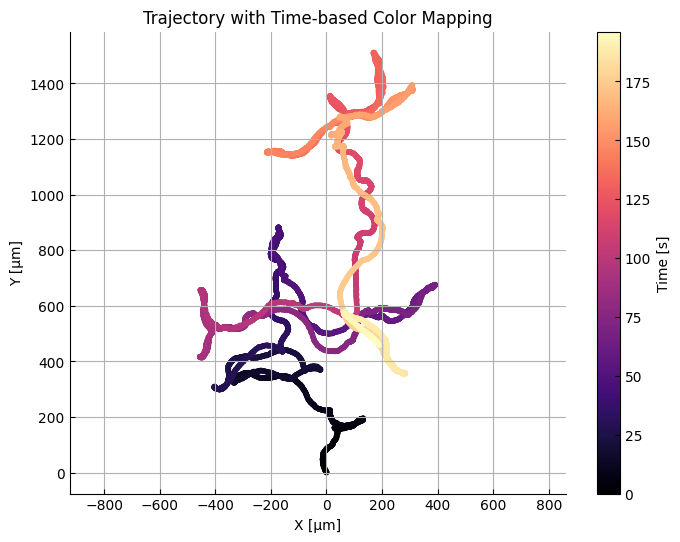

E:/_C.elegans/FigX/ana/20240507-202252tdTomato-19mW-2


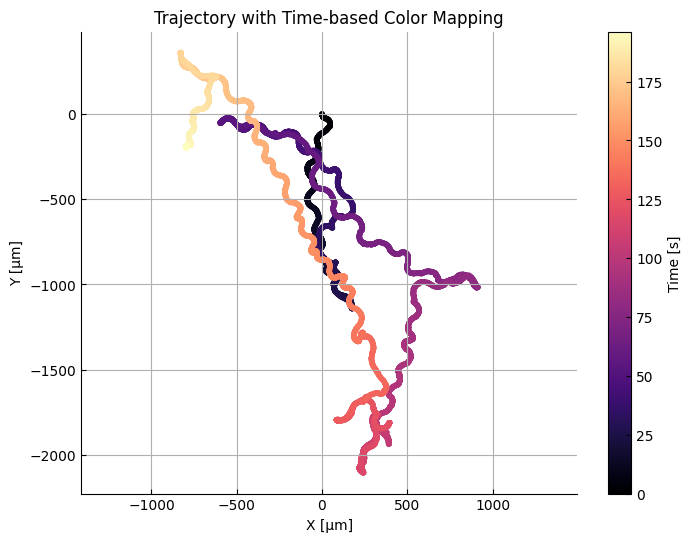

E:/_C.elegans/FigX/ana/20240507-203354tdTomato-19mW-5


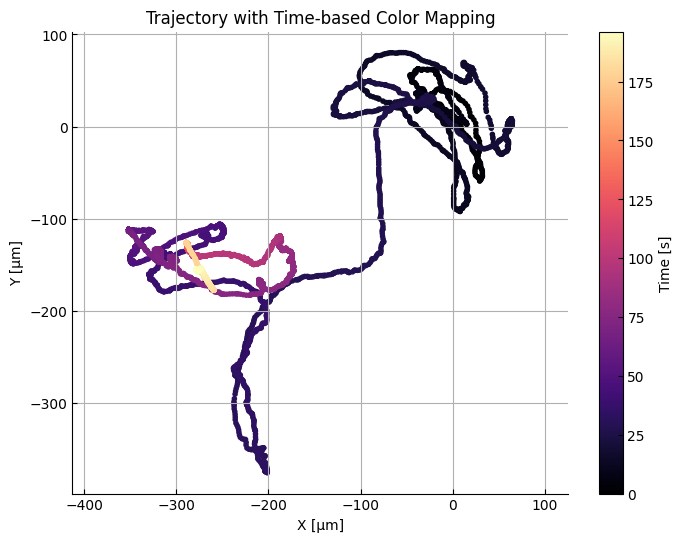

E:/_C.elegans/FigX/ana/20240508-174849tdTomato-12mW-3


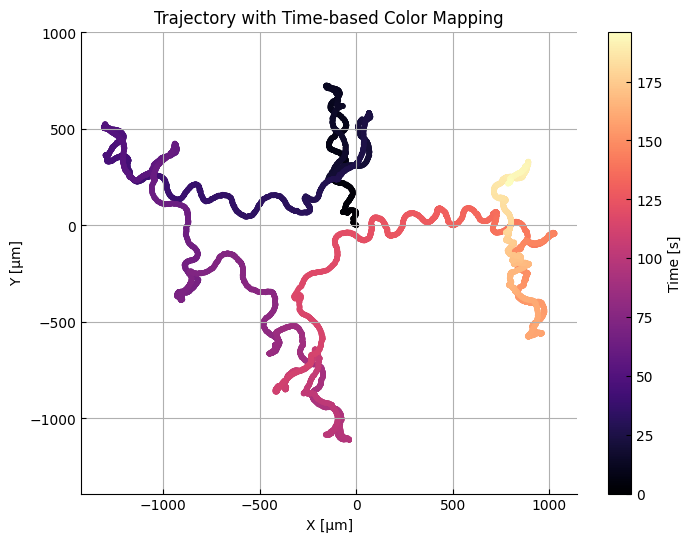

E:/_C.elegans/FigX/ana/20240508-185610tdTomato-10mW-1good


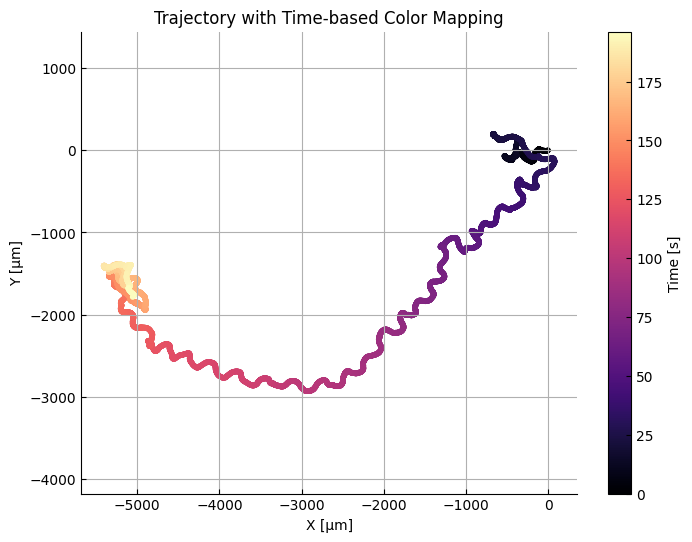

E:/_C.elegans/FigX/ana/20240508-200229tdTomato-10mW-4


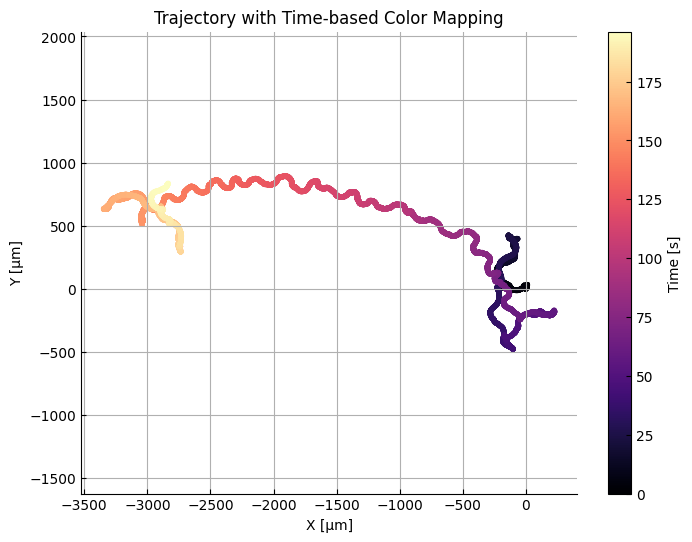

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


for h in range(len(folder_paths)):
    folder_paths[h] = folder_paths[h].replace("\\", "/")
    print(folder_paths[h])

    # bright image csv file's path
    file_path = folder_paths[h] + "/" + "log matching 50 fps.csv"
    df = pd.read_csv(file_path,encoding="shift-jis")

    # 原点を frame = 1 の座標に設定
    origin_x = df['stageX[pulse]'].iloc[0]
    origin_y = df['stageY[pulse]'].iloc[0]

    # 原点からの相対位置を計算
    df['relativeX'] = (df['stageX[pulse]'] - origin_x) * -1 * 0.01590033
    df['relativeY'] = (df['stageY[pulse]'] - origin_y) * -1 * 0.01590033

    # 時間原点を frame = 1 の座標に設定
    origin_time = df['timestamp'].iloc[0]
    
    # 時間原点からの相対時間を計算し、カラーマッピング用に正規化
    df['relativeTime'] = df['timestamp'] - origin_time
    colors = plt.cm.viridis(np.linspace(0, 1, len(df['relativeTime'])))

    # 軌跡をプロット
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(df['relativeX'], df['relativeY'], c=df['relativeTime'], cmap='magma', marker='.')
    # cmap['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'hsv', 'rainbow', 'jet', 'turbo', 'nipy_spectral', gist_rainbow']
    
    # グラフの装飾
    plt.rcParams['xtick.direction'] = 'in'  # メモリの向き in：内向き、out：外向き
    plt.rcParams['ytick.direction'] = 'in'
    plt.title('Trajectory with Time-based Color Mapping')
    plt.xlabel(f'X [µm]')
    plt.ylabel(f'Y [µm]')
    plt.grid(True)
    plt.axis('equal')  # スケールを揃える
    plt.gca().spines['right'].set_visible(False)    # グラフの枠 False：非表示
    plt.gca().spines['top'].set_visible(False)
    

    # カラーバーを表示
    cbar = plt.colorbar(scatter)
    cbar.set_label('Time [s]')
    
    # グラフを保存
    new_path = folder_paths[h].replace("/ana/", "/figs/")
    plt.savefig(new_path + '/Tracks.jpeg')  # ここでファイル名と形式を指定

    # グラフを表示
    plt.show()